# Description 

This notebook provides visual, analysis, and suggestions from the dataset.

There are two parts:

    1. Data-Cleaning 
    2. Data Analysis / Visualization 
    
Final insights will be provided in README.md

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sqlite3
from pathlib import Path 

%matplotlib inline

PROJECT_ROOT = Path.cwd().parent

DATA = 'churn.db'

conn = sqlite3.connect(DATA)


query =  """
SELECT * 

FROM customer_churn_raw
"""

df = pd.read_sql(query, conn)

In [15]:
df.columns.unique()

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

## Data Cleaning 

In [3]:
# Standardise the texts 

obj_cols = df.select_dtypes('object').columns

df[obj_cols] = (
    df[obj_cols].apply(lambda col: col.str.strip().str.lower())
)

In [14]:
# Standardise the Binary columns 

bin_col = [col for col in df.columns if df[col].isin(['Yes', 'No', 'yes', 'no']).all()]

df[bin_col] = df[bin_col].replace({
    'yes':'Yes',
    'no':'No'
})

In [23]:
# Removing columns that does not hold much useful information

col_remove = ['Count', 'Lat Long', 'CustomerID']
df.drop(columns=col_remove, inplace=True)

In [24]:
# Checking for NaN 

df.isna().sum()

Country                 0
State                   0
City                    0
Zip Code                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

There are 5174 NaN values in Churn Reason, the remaining reasons will be investigated

# Data Analysis 

In [42]:
# ------------------- Customer Churn Reason Analysis -------------------------
# NOTE: People who answered Churn Reason are the ones who churned 
# 1. What are the primary reason customers choose to leave ? 
# 2. Service VS Churn Reason (What are the main reasons for each service customer churning ?)
df['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

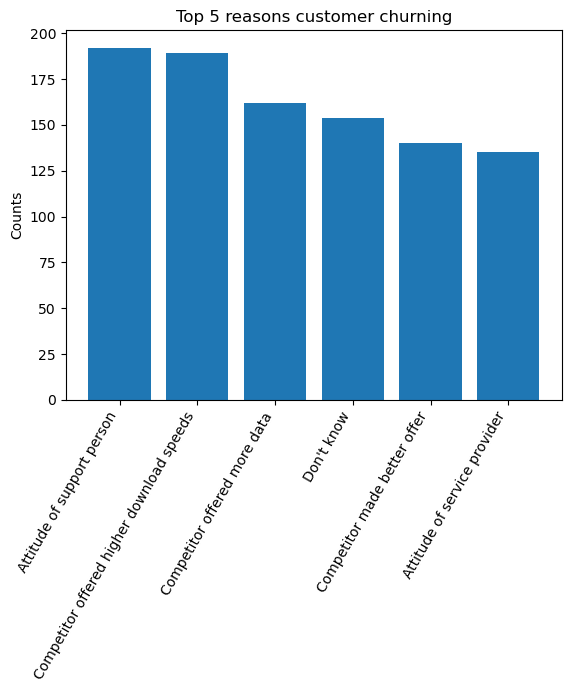

In [41]:
# 1. What are the primary reason customers choose to leave ? 

top_5_reasons = df['Churn Reason'].value_counts()[0:6]
plt.bar(top_5_reasons.index, top_5_reasons.values)
plt.xticks(rotation=60, ha='right')
plt.title('Top 5 reasons customer churning')
plt.ylabel('Counts');

The main reasons were that competitor made better offer to customers, and additionally 